In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kaggle_diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.shape

(2000, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


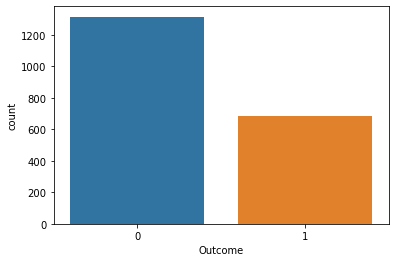

In [6]:
sns.countplot(df['Outcome'])

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
a= df ==0
a.sum().sum()

3277

In [10]:
print("Total Zero Values Are",a.sum().sum())

Total Zero Values Are 3277


In [11]:
df_copy = df.copy(deep=True)
#convert zero to nan
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [13]:

a = df_copy == 0
print("After Convert Zero values",a.sum().sum())

After Convert Zero values 1617


In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   1987 non-null   float64
 2   BloodPressure             1910 non-null   float64
 3   SkinThickness             1427 non-null   float64
 4   Insulin                   1044 non-null   float64
 5   BMI                       1972 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [15]:

#total null value
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:

#treat with null values
df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['BloodPressure'] = df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean())
df_copy['SkinThickness'] = df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median())
df_copy['Insulin']=df_copy['Insulin'].fillna(df_copy['Insulin'].median())
df_copy['BMI'] = df_copy['BMI'].fillna(df_copy['BMI'].median())

In [17]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

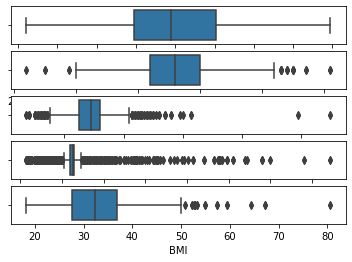

In [20]:
plt.subplot(511)
sns.boxplot(df_copy['Glucose'])

plt.subplot(512)
sns.boxplot(df_copy['BloodPressure'])

plt.subplot(513)
sns.boxplot(df_copy['SkinThickness'])

plt.subplot(514)
sns.boxplot(df_copy['Insulin'])

plt.subplot(515)
sns.boxplot(df_copy['BMI'])

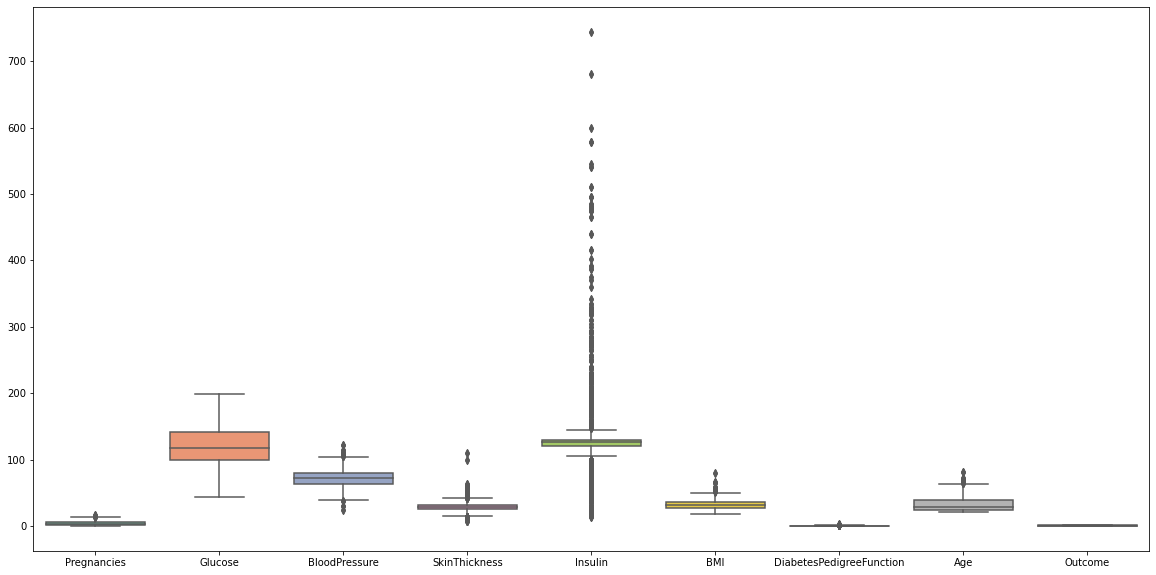

In [26]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=df_copy,palette="Set2")

In [27]:
X = df.drop("Outcome",axis=1)
y = df['Outcome']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 41)

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

E:\Users\azmina.vanzara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[245,  21],
       [ 59,  75]], dtype=int64)

In [33]:
lr.score(X_test,y_test)*100

80.0

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred_rfc = rfc.predict(X_test)

In [36]:

cm_rfc = confusion_matrix(y_test,y_pred_rfc)
cm_rfc

array([[266,   0],
       [  2, 132]], dtype=int64)

In [38]:

rfc.score(X_test,y_test)*100

99.5

In [42]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [43]:
cat.fit(X_train,y_train)

y_test_pred_cat = cat.predict(X_test)

Learning rate set to 0.012592
0:	learn: 0.6857505	total: 61.2ms	remaining: 1m 1s
1:	learn: 0.6788741	total: 65.4ms	remaining: 32.6s
2:	learn: 0.6726350	total: 69.5ms	remaining: 23.1s
3:	learn: 0.6652586	total: 73.1ms	remaining: 18.2s
4:	learn: 0.6596510	total: 76.2ms	remaining: 15.2s
5:	learn: 0.6526478	total: 79.5ms	remaining: 13.2s
6:	learn: 0.6474897	total: 83.5ms	remaining: 11.8s
7:	learn: 0.6421874	total: 87.5ms	remaining: 10.8s
8:	learn: 0.6355164	total: 90.9ms	remaining: 10s
9:	learn: 0.6306428	total: 94.3ms	remaining: 9.34s
10:	learn: 0.6245154	total: 98.4ms	remaining: 8.85s
11:	learn: 0.6188087	total: 104ms	remaining: 8.6s
12:	learn: 0.6144287	total: 108ms	remaining: 8.22s
13:	learn: 0.6080113	total: 114ms	remaining: 8s
14:	learn: 0.6017223	total: 118ms	remaining: 7.74s
15:	learn: 0.5963768	total: 122ms	remaining: 7.48s
16:	learn: 0.5924659	total: 126ms	remaining: 7.26s
17:	learn: 0.5887402	total: 130ms	remaining: 7.07s
18:	learn: 0.5834974	total: 135ms	remaining: 6.97s
19:	le

174:	learn: 0.3501663	total: 743ms	remaining: 3.5s
175:	learn: 0.3496612	total: 747ms	remaining: 3.5s
176:	learn: 0.3489784	total: 753ms	remaining: 3.5s
177:	learn: 0.3480507	total: 758ms	remaining: 3.5s
178:	learn: 0.3475709	total: 762ms	remaining: 3.5s
179:	learn: 0.3471153	total: 767ms	remaining: 3.5s
180:	learn: 0.3466645	total: 771ms	remaining: 3.49s
181:	learn: 0.3457237	total: 775ms	remaining: 3.48s
182:	learn: 0.3452263	total: 778ms	remaining: 3.48s
183:	learn: 0.3445244	total: 783ms	remaining: 3.47s
184:	learn: 0.3437459	total: 788ms	remaining: 3.47s
185:	learn: 0.3431904	total: 792ms	remaining: 3.46s
186:	learn: 0.3424352	total: 795ms	remaining: 3.46s
187:	learn: 0.3419052	total: 800ms	remaining: 3.46s
188:	learn: 0.3414274	total: 804ms	remaining: 3.45s
189:	learn: 0.3409553	total: 808ms	remaining: 3.44s
190:	learn: 0.3405946	total: 811ms	remaining: 3.44s
191:	learn: 0.3397195	total: 816ms	remaining: 3.43s
192:	learn: 0.3388556	total: 821ms	remaining: 3.43s
193:	learn: 0.3384

342:	learn: 0.2758703	total: 1.39s	remaining: 2.66s
343:	learn: 0.2755917	total: 1.39s	remaining: 2.66s
344:	learn: 0.2753259	total: 1.4s	remaining: 2.65s
345:	learn: 0.2747913	total: 1.4s	remaining: 2.65s
346:	learn: 0.2745476	total: 1.41s	remaining: 2.65s
347:	learn: 0.2743574	total: 1.41s	remaining: 2.64s
348:	learn: 0.2741125	total: 1.41s	remaining: 2.64s
349:	learn: 0.2737019	total: 1.42s	remaining: 2.63s
350:	learn: 0.2732697	total: 1.42s	remaining: 2.63s
351:	learn: 0.2729331	total: 1.42s	remaining: 2.62s
352:	learn: 0.2726698	total: 1.43s	remaining: 2.62s
353:	learn: 0.2723646	total: 1.43s	remaining: 2.61s
354:	learn: 0.2718865	total: 1.44s	remaining: 2.61s
355:	learn: 0.2716442	total: 1.44s	remaining: 2.6s
356:	learn: 0.2714787	total: 1.44s	remaining: 2.6s
357:	learn: 0.2712025	total: 1.45s	remaining: 2.59s
358:	learn: 0.2709129	total: 1.45s	remaining: 2.59s
359:	learn: 0.2706775	total: 1.45s	remaining: 2.58s
360:	learn: 0.2702217	total: 1.46s	remaining: 2.58s
361:	learn: 0.27

540:	learn: 0.2184484	total: 2.2s	remaining: 1.87s
541:	learn: 0.2182552	total: 2.21s	remaining: 1.87s
542:	learn: 0.2180419	total: 2.21s	remaining: 1.86s
543:	learn: 0.2176538	total: 2.22s	remaining: 1.86s
544:	learn: 0.2171889	total: 2.22s	remaining: 1.85s
545:	learn: 0.2167053	total: 2.23s	remaining: 1.85s
546:	learn: 0.2163655	total: 2.23s	remaining: 1.85s
547:	learn: 0.2161750	total: 2.23s	remaining: 1.84s
548:	learn: 0.2158231	total: 2.24s	remaining: 1.84s
549:	learn: 0.2156022	total: 2.24s	remaining: 1.83s
550:	learn: 0.2153051	total: 2.24s	remaining: 1.83s
551:	learn: 0.2150958	total: 2.25s	remaining: 1.82s
552:	learn: 0.2149194	total: 2.25s	remaining: 1.82s
553:	learn: 0.2146714	total: 2.25s	remaining: 1.81s
554:	learn: 0.2146136	total: 2.26s	remaining: 1.81s
555:	learn: 0.2144599	total: 2.26s	remaining: 1.8s
556:	learn: 0.2140851	total: 2.26s	remaining: 1.8s
557:	learn: 0.2137740	total: 2.27s	remaining: 1.8s
558:	learn: 0.2131741	total: 2.27s	remaining: 1.79s
559:	learn: 0.21

714:	learn: 0.1751594	total: 2.86s	remaining: 1.14s
715:	learn: 0.1749934	total: 2.86s	remaining: 1.14s
716:	learn: 0.1748807	total: 2.87s	remaining: 1.13s
717:	learn: 0.1745912	total: 2.87s	remaining: 1.13s
718:	learn: 0.1743693	total: 2.88s	remaining: 1.12s
719:	learn: 0.1741461	total: 2.88s	remaining: 1.12s
720:	learn: 0.1740014	total: 2.88s	remaining: 1.12s
721:	learn: 0.1738992	total: 2.89s	remaining: 1.11s
722:	learn: 0.1735457	total: 2.89s	remaining: 1.11s
723:	learn: 0.1733494	total: 2.89s	remaining: 1.1s
724:	learn: 0.1730456	total: 2.9s	remaining: 1.1s
725:	learn: 0.1728028	total: 2.91s	remaining: 1.1s
726:	learn: 0.1725154	total: 2.91s	remaining: 1.09s
727:	learn: 0.1722906	total: 2.92s	remaining: 1.09s
728:	learn: 0.1719758	total: 2.92s	remaining: 1.08s
729:	learn: 0.1717362	total: 2.92s	remaining: 1.08s
730:	learn: 0.1715224	total: 2.93s	remaining: 1.08s
731:	learn: 0.1713425	total: 2.93s	remaining: 1.07s
732:	learn: 0.1710980	total: 2.94s	remaining: 1.07s
733:	learn: 0.17

896:	learn: 0.1402939	total: 3.5s	remaining: 402ms
897:	learn: 0.1401387	total: 3.51s	remaining: 398ms
898:	learn: 0.1399597	total: 3.51s	remaining: 394ms
899:	learn: 0.1398080	total: 3.51s	remaining: 390ms
900:	learn: 0.1394656	total: 3.52s	remaining: 386ms
901:	learn: 0.1392578	total: 3.52s	remaining: 383ms
902:	learn: 0.1390172	total: 3.52s	remaining: 379ms
903:	learn: 0.1388518	total: 3.53s	remaining: 375ms
904:	learn: 0.1386251	total: 3.53s	remaining: 371ms
905:	learn: 0.1384779	total: 3.54s	remaining: 367ms
906:	learn: 0.1383472	total: 3.54s	remaining: 363ms
907:	learn: 0.1382862	total: 3.54s	remaining: 359ms
908:	learn: 0.1381335	total: 3.55s	remaining: 355ms
909:	learn: 0.1379219	total: 3.55s	remaining: 351ms
910:	learn: 0.1378504	total: 3.55s	remaining: 347ms
911:	learn: 0.1376103	total: 3.56s	remaining: 343ms
912:	learn: 0.1374769	total: 3.56s	remaining: 339ms
913:	learn: 0.1372177	total: 3.56s	remaining: 335ms
914:	learn: 0.1371230	total: 3.56s	remaining: 331ms
915:	learn: 0

In [44]:
cat.score(X_test,y_test)*100

95.25

In [39]:

df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


In [40]:
#result for Logisic Regression
result = lr.predict([[0, #Pregnancies
                  84.0, #Glucose
                  82.000000, #BloodPressure
                  31.0, #SkinThickness 
                  125.0, #Insulin
                  38.2, #BMI
                  0.233, #DiabetesPedigreeFunction
                  23 #Age
                     ]])
result
#logistic regression not give accurate

array([0], dtype=int64)

In [41]:

#result for Random Forest Classifier
result = rfc.predict([[0, #Pregnancies
                  84.0, #Glucose
                  82.000000, #BloodPressure
                  31.0, #SkinThickness 
                  125.0, #Insulin
                  38.2, #BMI
                  0.233, #DiabetesPedigreeFunction
                  23 #Age
                      ]])
result
#rfc give accurate

array([0], dtype=int64)

In [46]:
import pickle
# Creating a pickle file for the classifier use randomforest classifier
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(rfc, open(filename, 'wb'))